Code for analysing the EA output. This code contains functions for producing the fitness function of each graph. 
Date: 27/01/2020

In [9]:
from analyse_population import get_stk_pop
from pathlib import Path
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit.Chem import AllChem as rdkit

%matplotlib inline

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
ea_run_paths = list(Path('/Volumes/Steven_HDD/CX1').glob('case_study*/**/run*_f/ea_run.log'))

In [14]:
run_data = [get_stk_pop(str(pop)) for pop in ea_run_paths]

Embedding with seed value of "4" failed. Using alternative value of "14" was successful.
Embedding with seed value of "4" failed. Using alternative value of "14" was successful.
Embedding with seed value of "4" failed. Using alternative value of "14" was successful.
Embedding with seed value of "4" failed. Using alternative value of "14" was successful.
Embedding with seed value of "4" failed. Using alternative value of "14" was successful.
Embedding with seed value of "4" failed. Using alternative value of "14" was successful.
Embedding with seed value of "4" failed. Using alternative value of "14" was successful.
Embedding with seed value of "4" failed. Using alternative value of "14" was successful.
Embedding with seed value of "4" failed. Using alternative value of "14" was successful.
Embedding with seed value of "4" failed. Using alternative value of "14" was successful.
Embedding with seed value of "4" failed. Using alternative value of "14" was successful.
Embedding with seed v

In [23]:
list(run_data[0].values())[0][0][0].fitness_vector[3]

1.7000000000000002

In [ ]:
for file in run_data:
    path = list(file.keys())[0]
    with open(default_path.joinpath(f'{get_filepath(path)}.json'), 'w') as w:
        gen_data = [str(mol) for gen in file.values() for mol in gen] 
        write_json = {str(list(file.keys())[0]): gen_data}
        json.dump(write_json, w)

In [28]:
def get_filepath(path):
    parents = path.parents
    run_num = parents[0].stem
    if 'case_study_1' in str(path):
        case_study = 'case_study_1'
    elif 'case_study_2' in str(path):
        case_study = 'case_study_2'
    if parents[1].stem =='NoSA':
        return f'{parents[1].stem}_{run_num}_{case_study}'
    else:
        return f'{parents[2].stem}_{parents[1].stem}_{run_num}_{case_study}'

In [ ]:
default_path = Path('/Users/stevenbennett/Downloads/')

In [302]:
data = list(filter(lambda x: '/case_study_1_shape_persistant/SAScore/coefficient_5/' in str(list(x.keys())), run_data))

In [360]:
def fitness_plotter(data):
    df = pd.DataFrame()
    d = {}
    run_name = get_filepath(list(data[0].keys())[0])
    fig_max = plt.figure()
    fig_min = plt.figure()
    fig_mean = plt.figure()
    ax_max = fig_max.add_subplot(1,1,1)
    ax_min = fig_min.add_subplot(1,1,1)
    ax_mean = fig_mean.add_subplot(1,1,1)
    ax_max.set_xlabel('Generation number / arbitary units')
    ax_min.set_xlabel('Generation number / arbitary units')
    ax_mean.set_xlabel('Generation number / arbitary units')
    ax_max.set_ylabel('Maximum fitness / arbitary units')
    ax_min.set_ylabel('Minimum fitness / arbitary units')
    ax_mean.set_ylabel('Mean fitness / arbitary units')
    
    if 'case_study_1' in run_name:
        case_study = 'case_study_1'
        case_study_title = 'case study 1'
    elif 'case_study_2' in run_name:
        case_study = 'case_study_2'
        case_study_title = 'case study 2'
    # Coefficients    
    if 'coefficient_1_' in run_name:
        coefficient = str(1)
    elif 'coefficient_5' in run_name:
        coefficient = str(5)
    elif 'coefficient_10_' in run_name:
        coefficient = str(10)
        
    if 'ML_Model' in run_name:
        f_name = f'ml_model_coefficient_{coefficient}_{case_study}'
        ax_max.set_title(f'Maximum fitness for ML model run using coefficient {coefficient} in {case_study_title}')
        ax_min.set_title(f'Minimum fitness for ML model run using coefficient {coefficient} in {case_study_title}')
        ax_mean.set_title(f'Mean fitness for ML model run using coefficient {coefficient} in {case_study_title}')
        
    elif 'SAScore' in run_name:
        f_name = f'sa_score_coefficient_{coefficient}_{case_study}'
        ax_max.set_title(f'Maximum fitness for SAScore run using coefficient {coefficient} in {case_study_title}')
        ax_min.set_title(f'Minimum fitness for SAScore run using coefficient {coefficient} in {case_study_title}')
        ax_mean.set_title(f'Mean fitness for SAScore model run using coefficient {coefficient} in {case_study_title}')
    
    elif 'SCScore' in run_name:
        f_name = f'sc_score_coefficient_{coefficient}_{case_study}'
        ax_max.set_title(f'Maximum fitness for SCScore run using coefficient {coefficient} in {case_study_title}')
        ax_min.set_title(f'Minimum fitness for SCScore run using coefficient {coefficient} in {case_study_title}')
        ax_mean.set_title(f'Mean fitness for SCScore model run using coefficient {coefficient} in {case_study_title}')
        
    elif 'No_SA' in run_name:
        f_name = f'nosa_{case_study}'
        ax_max.set_title(f'Maximum fitness for run not using synthetic accesibility scoring in {case_study_title}')
        ax_min.set_title(f'Minimum fitness for run not using synthetic accesibility scoring in {case_study_title}')
        ax_mean.set_title(f'Mean fitness for run not using synthetic accesibility scoring in {case_study_title}')

    for i, run in enumerate(data):
        fitness_values = []
        d_gen = {}
        total = list(run.values())[0]
        d_gen['max']= []
        d_gen['min'] = []
        d_gen['mean'] = []
        for gen in total:
            d_gen['max'].append(max(cage.fitness_value for cage in gen))
            d_gen['min'].append(min(cage.fitness_value for cage in gen))
            d_gen['mean'].append(np.mean(np.array(list(cage.fitness_value for cage in gen))))
        ax_max.plot(list(range(1,51)), d_gen['max'])
        ax_min.plot(list(range(1,51)), d_gen['min'])
        ax_mean.plot(list(range(1,51)), d_gen['mean'])
        ax_max.legend([f'Run {i}' for i in range(len(data))])
        ax_min.legend([f'Run {i}' for i in range(len(data))])
        ax_mean.legend([f'Run {i}' for i in range(len(data))])
        d[f'run_{i}'] = d_gen
    sns.despine(fig=fig_max)
    sns.despine(fig=fig_min)
    sns.despine(fig=fig_mean)
    fig_max.savefig(fname=f'{f_name}_max.pdf', forrmat='pdf')
    fig_min.savefig(fname=f'{f_name}_min.pdf', forrmat='pdf')
    fig_mean.savefig(fname=f'{f_name}_mean.pdf', forrmat='pdf')
    return fig_max, fig_mean, fig_min
            

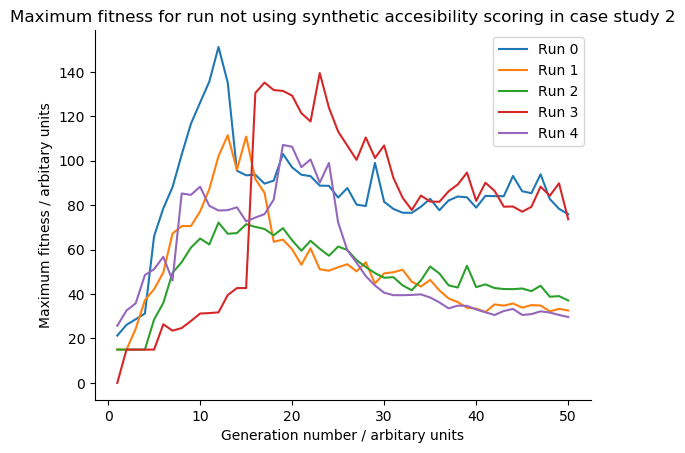

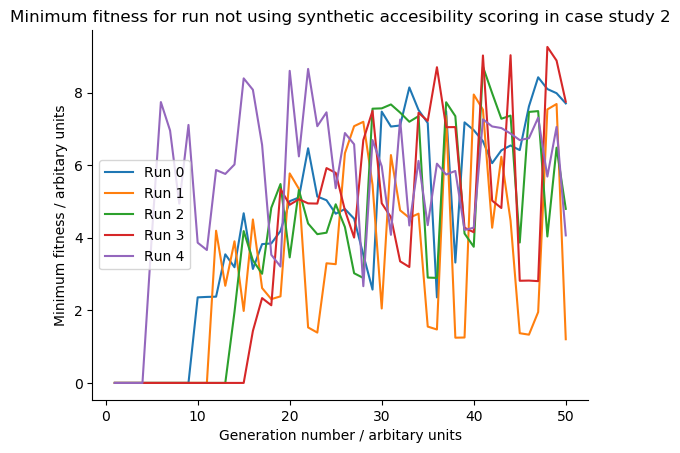

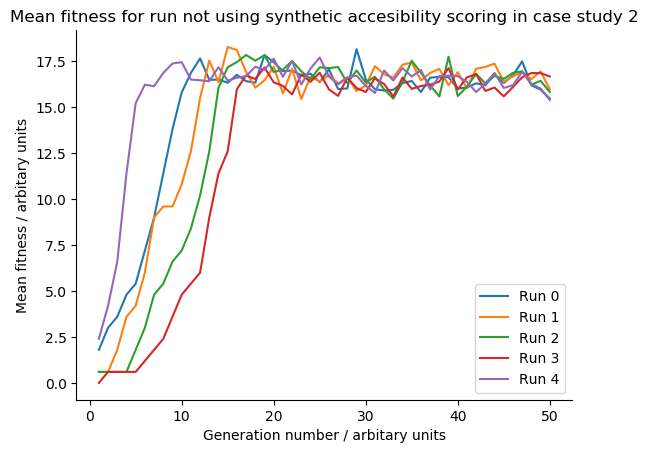

In [371]:
data = list(filter(lambda x: '/case_study_2_pore_volume/No_SA/' in str(list(x.keys())), run_data))
fig_max, fig_mean, fig_min = fitness_plotter(data)

In [203]:
axes = fig.add_subplot(1,1,1)
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [24]:
def fitness_vector_plotter(data, index):
    df = pd.DataFrame()
    d = {}
    run_name = get_filepath(list(data[0].keys())[0])
    fig_max = plt.figure()
    fig_min = plt.figure()
    fig_mean = plt.figure()
    ax_max = fig_max.add_subplot(1,1,1)
    ax_min = fig_min.add_subplot(1,1,1)
    ax_mean = fig_mean.add_subplot(1,1,1)
    attributes = {
        0: 'Pore volume / A^3 ',
        1: 'Window size / A',
        2: 'Window std. / A',
        3: 'Synthetic accesibility / arbitary units'
    }
    ax_max.set_xlabel('Generation number / arbitary units')
    ax_min.set_xlabel('Generation number / arbitary units')
    ax_mean.set_xlabel('Generation number / arbitary units')
    ax_max.set_ylabel(f'{attributes[index]}')
    ax_min.set_ylabel(f'{attributes[index]}')
    ax_mean.set_ylabel(f'{attributes[index]}')
    
    if 'case_study_1' in run_name:
        case_study = 'case_study_1'
        case_study_title = 'case study 1'
    elif 'case_study_2' in run_name:
        case_study = 'case_study_2'
        case_study_title = 'case study 2'
    # Coefficients    
    if 'coefficient_1_' in run_name:
        coefficient = str(1)
    elif 'coefficient_5' in run_name:
        coefficient = str(5)
    elif 'coefficient_10_' in run_name:
        coefficient = str(10)
        
    if 'ML_Model' in run_name:
        f_name = f'ml_model_coefficient_{coefficient}_{case_study}'
        ax_max.set_title(f'Max {attributes[index]} for ML model run using coefficient {coefficient} in {case_study_title}')
        ax_min.set_title(f'Min {attributes[index]} for ML model run using coefficient {coefficient} in {case_study_title}')
        ax_mean.set_title(f'Mean {attributes[index]} for ML model run using coefficient {coefficient} in {case_study_title}')
        
    elif 'SAScore' in run_name:
        f_name = f'sa_score_coefficient_{coefficient}_{case_study}'
        ax_max.set_title(f'Max {attributes[index]} for SAScore run using coefficient {coefficient} in {case_study_title}')
        ax_min.set_title(f'Min {attributes[index]} for SAScore run using coefficient {coefficient} in {case_study_title}')
        ax_mean.set_title(f'Mean {attributes[index]} for SAScore model run using coefficient {coefficient} in {case_study_title}')
    
    elif 'SCScore' in run_name:
        f_name = f'sc_score_coefficient_{coefficient}_{case_study}'
        ax_max.set_title(f'Max {attributes[index]} for SCScore run using coefficient {coefficient} in {case_study_title}')
        ax_min.set_title(f'Min {attributes[index]} for SCScore run using coefficient {coefficient} in {case_study_title}')
        ax_mean.set_title(f'Mean {attributes[index]} for SCScore model run using coefficient {coefficient} in {case_study_title}')
        
    elif 'No_SA' in run_name:
        f_name = f'nosa_{case_study}'
        ax_max.set_title(f'Max {attributes[index]} for run not using synthetic accesibility scoring in {case_study_title}')
        ax_min.set_title(f'Min {attributes[index]} for run not using synthetic accesibility scoring in {case_study_title}')
        ax_mean.set_title(f'Mean {attributes[index]} for run not using synthetic accesibility scoring in {case_study_title}')

    for i, run in enumerate(data):
        fitness_values = []
        d_gen = {}
        total = list(run.values())[0]
        d_gen['max']= []
        d_gen['min'] = []
        d_gen['mean'] = []
        for i, gen in enumerate(total):
            if None in [cage.fitness_vector[1] for cage in gen[:50]]:
                print('Cage collapsed.')
                continue
            try:
                d_gen['max'].append(max(list(filter(lambda x: x is not None, (cage.fitness_vector[index] for cage in gen[:50])))))
            except:
                d_gen['max'].append(1e-8)
            try:
                d_gen['min'].append(min(list(filter(lambda x: x is not None, (cage.fitness_vector[index] for cage in gen[:50])))))
            except:
                d_gen['max'].append(1e-8)    
            try:
                d_gen['mean'].append(np.mean(np.array(list(filter(lambda x: x is not None, (cage.fitness_vector[index] for cage in gen[:50]))))))
            except:
                d_gen['max'].append(1e-8)
        ax_max.plot(list(range(len(d_gen['max']))), d_gen['max'])
        ax_min.plot(list(range(len(d_gen['min']))), d_gen['min'])
        ax_mean.plot(list(range(len(d_gen['mean']))), d_gen['mean'])
        ax_max.legend([f'Run {i}' for i in range(len(data))])
        ax_min.legend([f'Run {i}' for i in range(len(data))])
        ax_mean.legend([f'Run {i}' for i in range(len(data))])
        d[f'run_{i}'] = d_gen
    sns.despine(fig=fig_max)
    sns.despine(fig=fig_min)
    sns.despine(fig=fig_mean)
    fig_max.savefig(fname=f'{index}_{f_name}_max.pdf', forrmat='pdf')
    fig_min.savefig(fname=f'{index}_{f_name}_min.pdf', forrmat='pdf')
    fig_mean.savefig(fname=f'{index}_{f_name}_mean.pdf', forrmat='pdf')
    return fig_max, fig_mean, fig_min

Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.
Cage collapsed.


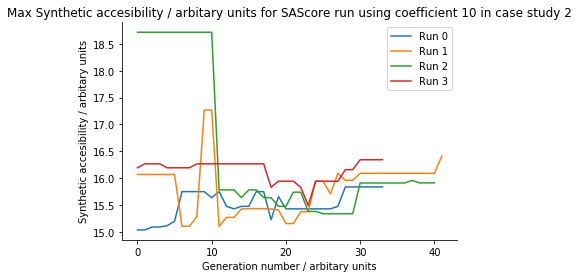

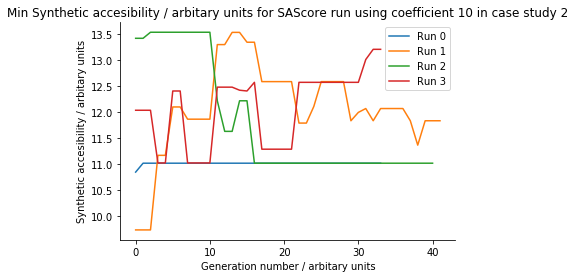

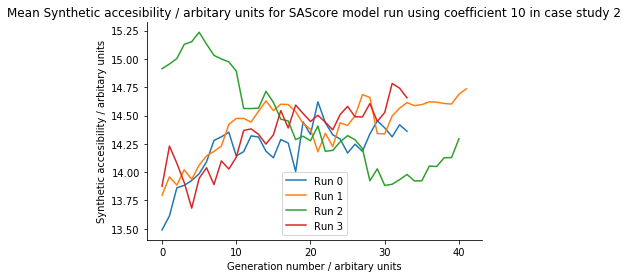

In [35]:
data = list(filter(lambda x: '/case_study_2_pore_volume/SAScore/coefficient_10' in str(list(x.keys())), run_data))
fig_main = fitness_vector_plotter(data, 3)


In [30]:
ls

3_sc_score_coefficient_10_case_study_2_max.pdf*
3_sc_score_coefficient_10_case_study_2_mean.pdf*
3_sc_score_coefficient_10_case_study_2_min.pdf*
Untitled.ipynb*
__pycache__/
analyse_population.py*
best_cage.mol*
compress/
ea_analysis.ipynb*
example_population/
graphs/
pop_analysis.ipynb*
renamer.ipynb*
sa_score_coefficient_5_case study 1.pdf*
total.pdf*
total.svg*
total_ml.svg*
total_sa.svg*
total_sc.svg*


In [670]:
best_fit = []
for gen in list(data[0].values())[0]:
    best_fit.append(max(m.fitness_value for m in gen))
for gen in list(data[0].values())[0]:
    for i in gen:
        if i.fitness_value == max(best_fit):
            best_cage = i

Hi


In [671]:
best_cage

ConstructedMolecule(building_blocks=[BuildingBlock('O=CC(C=O)C=O', ['aldehyde']), BuildingBlock('NC1C(N)C1C(F)(F)F', ['primary_amine'])], topology_graph=cage.FourPlusSix(vertex_alignments={0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}))

In [657]:
rdkit.MolToSmiles(list(best_cage.get_building_blocks())[1].to_rdkit_mol(), allHsExplicit=True, canonical=False)

'[N]([C]12[C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([N]([H])[H])([C]1([H])[H])[C]2([H])[H])([H])[H]'

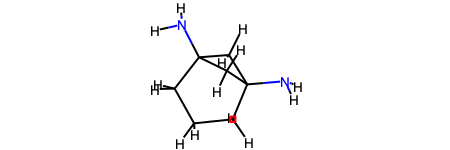

In [658]:
list(best_cage.get_building_blocks())[1].to_rdkit_mol()

In [624]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PyMol

In [626]:
v = PyMol.MolViewer()

In [629]:
v.ShowMol(best_cage.to_rdkit_mol())

''

In [588]:
def fitness_plotter_scatter(data):
    df = pd.DataFrame()
    d = {}
    sns.set_palette("colorblind")
    run_name = get_filepath(list(data[0].keys())[0])
    fig_max = plt.figure()
    fig_min = plt.figure()
    fig_mean = plt.figure()
    ax_max = fig_max.add_subplot(1,1,1)
    ax_min = fig_min.add_subplot(1,1,1)
    ax_mean = fig_mean.add_subplot(1,1,1)
    ax_max.set_xlabel('Generation number / arbitary units')
    ax_min.set_xlabel('Generation number / arbitary units')
    ax_mean.set_xlabel('Generation number / arbitary units')
    ax_max.set_ylabel('Maximum fitness / arbitary units')
    ax_min.set_ylabel('Minimum fitness / arbitary units')
    ax_mean.set_ylabel('Mean fitness / arbitary units')
    fig_main = plt.figure()
    ax_main = fig_main.add_subplot(1,1,1)
    ax_main.set_xlabel('Generation number / arbitary units')
    ax_main.set_ylabel('Fitness value / arbitary units')
    
    if 'case_study_1' in run_name:
        case_study = 'case_study_1'
        case_study_title = 'case study 1'
    elif 'case_study_2' in run_name:
        case_study = 'case_study_2'
        case_study_title = 'case study 2'
    # Coefficients    
    if 'coefficient_1_' in run_name:
        coefficient = str(1)
    elif 'coefficient_5' in run_name:
        coefficient = str(5)
    elif 'coefficient_10_' in run_name:
        coefficient = str(10)
        
    if 'ML_Model' in run_name:
        f_name = f'ml_model_coefficient_{coefficient}_{case_study}'
        ax_max.set_title(f'Maximum fitness for ML model run using coefficient {coefficient} in {case_study_title}')
        ax_min.set_title(f'Minimum fitness for ML model run using coefficient {coefficient} in {case_study_title}')
        ax_mean.set_title(f'Mean fitness for ML model run using coefficient {coefficient} in {case_study_title}')
        
    elif 'SAScore' in run_name:
        f_name = f'sa_score_coefficient_{coefficient}_{case_study}'
        ax_max.set_title(f'Maximum fitness for SAScore run using coefficient {coefficient} in {case_study_title}')
        ax_min.set_title(f'Minimum fitness for SAScore run using coefficient {coefficient} in {case_study_title}')
        ax_mean.set_title(f'Mean fitness for SAScore model run using coefficient {coefficient} in {case_study_title}')
    
    elif 'SCScore' in run_name:
        f_name = f'sc_score_coefficient_{coefficient}_{case_study}'
        ax_max.set_title(f'Maximum fitness for SCScore run using coefficient {coefficient} in {case_study_title}')
        ax_min.set_title(f'Minimum fitness for SCScore run using coefficient {coefficient} in {case_study_title}')
        ax_mean.set_title(f'Mean fitness for SCScore model run using coefficient {coefficient} in {case_study_title}')
        
    elif 'No_SA' in run_name:
        f_name = f'nosa_{case_study}'
        ax_max.set_title(f'Maximum fitness for run not using synthetic accesibility scoring in {case_study_title}')
        ax_min.set_title(f'Minimum fitness for run not using synthetic accesibility scoring in {case_study_title}')
        ax_mean.set_title(f'Mean fitness for run not using synthetic accesibility scoring in {case_study_title}')
    for i, run in enumerate(data):
        fitness_values = []
        d_gen = {}
        total = list(run.values())[0]
        d_gen['max']= []
        d_gen['min'] = []
        d_gen['mean'] = []
        for gen in total:
            d_gen['max'].append(max(cage.fitness_value for cage in gen))
            d_gen['min'].append(min(cage.fitness_value for cage in gen))
            d_gen['mean'].append(np.mean(np.array(list(cage.fitness_value for cage in gen))))
        ax_main.scatter(list(range(1,51)), d_gen['max'], label='Maximum fitness')
        ax_main.scatter(list(range(1,51)), d_gen['min'], label='Minimum fitness')
        ax_main.scatter(list(range(1,51)), d_gen['mean'], label='Mean fitness')
        ax_main.legend()
        ax_max.legend([f'Run {i}' for i in range(len(data))])
        ax_min.legend([f'Run {i}' for i in range(len(data))])
        ax_mean.legend([f'Run {i}' for i in range(len(data))])
        d[f'run_{i}'] = d_gen
        break
    sns.despine(fig=fig_max)
    sns.despine(fig=fig_min)
    sns.despine(fig=fig_main)
    fig_max.savefig(fname=f'{f_name}_max.pdf', forrmat='pdf')
    fig_min.savefig(fname=f'{f_name}_min.pdf', forrmat='pdf')
    fig_main.savefig(fname=f'4image.pdf', transparent=True, forrmat='pdf')
    return fig_main

<bound method Axes.legend of <matplotlib.axes._subplots.AxesSubplot object at 0x7fc1e4d81190>>